# Introduces the distributions in TensorFlow Probability

A **very** brief introduction in distributions in TFP.

In [4]:
try: #If running in colab 
    import google.colab
    IN_COLAB = True 
    %tensorflow_version 2.x
except:
    IN_COLAB = False

In [5]:
import tensorflow as tf
if (not tf.__version__.startswith('2')): #Checking if tf 2.0 is installed
    print('Please install tensorflow 2.0 to run this notebook')
print('Tensorflow version: ',tf.__version__, ' running in colab?: ', IN_COLAB)

Tensorflow version:  2.0.0  running in colab?:  False


In [6]:
# If you are not running in colab or use the provided docker container, you might need to install TFP
#!pip install tensorflow_probability==0.8.0

In [7]:
import tensorflow_probability as tfp
tfd = tfp.distributions

## Distributions for categorical data
### The Bernoulli Distribution (2-Classes)

In the Bernoulli Distribution the outcome is a single value either 0 or 1 

In [8]:
dist = tfd.Bernoulli(probs=0.1)

In [9]:
dist.mean(), dist.variance()

(<tf.Tensor: id=0, shape=(), dtype=float32, numpy=0.1>,
 <tf.Tensor: id=3, shape=(), dtype=float32, numpy=0.089999996>)

In [10]:
0.1*(1.0-0.1)

0.09000000000000001

In [11]:
dist.sample(55)

<tf.Tensor: id=25, shape=(55,), dtype=int32, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int32)>

In [12]:
dist.prob(1.0)

<tf.Tensor: id=34, shape=(), dtype=float32, numpy=0.099999994>

### The Categorical / Multinomial Distribution (more than 2 classes)

In the multinomial distribution the outcome is a one-hot encoded vector.

In [16]:
#dist = tfd.Multinomial(probs=(0.5, 0.3, 0.2), total_count=1)
dist = tfd.OneHotCategorical(probs=(0.5, 0.3, 0.2))

In [17]:
dist.sample(10)

<tf.Tensor: id=136, shape=(10, 3), dtype=int32, numpy=
array([[0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0]], dtype=int32)>

In [18]:
import numpy as np
np.mean(dist.sample(10000).numpy(), axis=0)

array([0.5003, 0.3049, 0.1948])

In [19]:
dist.mean()

<tf.Tensor: id=113, shape=(3,), dtype=float32, numpy=array([0.5, 0.3, 0.2], dtype=float32)>

## Continous Data
### The Normal distribution
The normal distribution samples a single value from a Gaussian

In [83]:
dist = tfd.Normal(loc=1,scale=2)
dist.mean(), dist.variance()

(<tf.Tensor: id=1335, shape=(), dtype=float32, numpy=1.0>,
 <tf.Tensor: id=1340, shape=(), dtype=float32, numpy=4.0>)

In [84]:
dist.sample(10)

<tf.Tensor: id=1363, shape=(10,), dtype=float32, numpy=
array([-0.1240294 ,  1.2293627 ,  3.3212876 ,  2.986776  , -2.5388434 ,
        4.3617887 , -0.7271137 , -0.59777737,  0.01766539, -0.13988268],
      dtype=float32)>

## Count Data
### The Poisson

2.3
2.3


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':


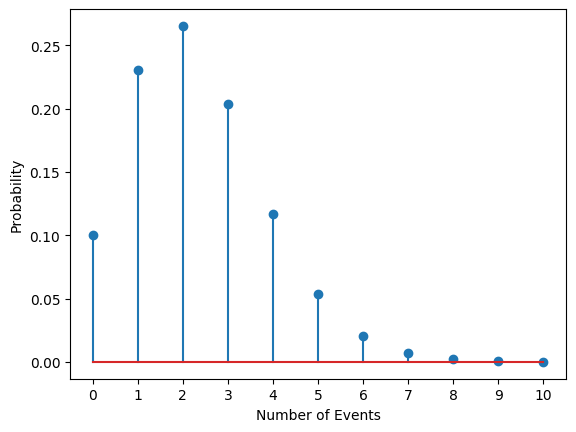

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

dist = tfd.poisson.Poisson(rate = 2.3) #A
vals = np.linspace(0,10,11) #B
p = dist.prob(vals) #C
print(dist.mean().numpy())  #D
print(dist.variance().numpy())   #E

plt.xticks(vals)
plt.stem(vals, p)
plt.xlabel('Number of Events')
plt.ylabel('Probability')
plt.show()

#A Poisson distribution with parameter rate = 2.3
#B Integer values from 0 to 10 for the x-axis 
#C Computes the probability for the values
#D The mean value yielding 2.3
#E The standard deviation yielding 2.3